In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    roc_curve,
    roc_auc_score,
    precision_recall_curve
)

from sklearn.ensemble import RandomForestClassifier


In [2]:
# Ignore warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:
# Get current working directory
curr_working_dir = os.getcwd()
print(curr_working_dir)


C:\CNT4153


In [4]:
# Get complete filepath
filepath = os.path.join(curr_working_dir, 'Final_Project_Data_Set', 'audit_risk.csv')
print(filepath)

# Read the csv and convert data into a DataFrame (DF)
df = pd.read_csv(filepath)


C:\CNT4153\Final_Project_Data_Set\audit_risk.csv


In [5]:
# Print out the first 5 rows of DF
df.head()


,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [6]:
# Show the dimensions of data
df.shape

# NOTE: there should be 776 rows and 27 columns (26 are features and the last one is target)


(776, 27)

In [7]:
# Show each column name and corresponding data type
df.dtypes


Sector_score      float64
LOCATION_ID        object
PARA_A            float64
Score_A           float64
Risk_A            float64
PARA_B            float64
Score_B           float64
Risk_B            float64
TOTAL             float64
numbers           float64
Score_B.1         float64
Risk_C            float64
Money_Value       float64
Score_MV          float64
Risk_D            float64
District_Loss       int64
PROB              float64
RiSk_E            float64
History             int64
Prob              float64
Risk_F            float64
Score             float64
Inherent_Risk     float64
CONTROL_RISK      float64
Detection_Risk    float64
Audit_Risk        float64
Risk                int64
dtype: object

In [8]:
# Show the number of unique values for each column
df.nunique()


Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [9]:
# 'Score_B' and 'Score_B.1' may be duplicate columns, so let's check their values
(df["Score_B"] == df["Score_B.1"]).value_counts()


True     523
False    253
Name: count, dtype: int64

In [10]:
# Show their differences
df[df["Score_B"] != df["Score_B.1"]][["Score_B", "Score_B.1"]]

# NOTE: Since both columns are not duplicates, we will keep both


,Score_B,Score_B.1
6,0.4,0.2
7,0.6,0.4
8,0.6,0.4
10,0.6,0.2
11,0.6,0.2
...,...,...
745,0.4,0.2
757,0.6,0.2
760,0.4,0.2
764,0.6,0.2


In [11]:
# 'PROB' and 'Prob' may be duplicate columns, so let's check their values
(df["PROB"] == df["Prob"]).value_counts()


True     713
False     63
Name: count, dtype: int64

In [12]:
# Show their differences
df[df["PROB"] != df["Prob"]][["PROB", "Prob"]]

# NOTE: Since both columns are not duplicates, we will keep both


,PROB,Prob
12,0.2,0.4
16,0.2,0.4
20,0.2,0.4
22,0.2,0.4
48,0.2,0.6
...,...,...
539,0.2,0.4
550,0.4,0.2
584,0.2,0.6
590,0.2,0.4


In [13]:
# Let's rename the 'Score_B', 'Score_B.1', 'PROB', and 'Prob' columns to more meaningful names
df = df.rename(columns={
    "Score_B": "Score_B1",
    "Score_B.1": "Score_B2",
    "PROB": "PROB_1",
    "Prob": "PROB_2"
})


In [14]:
# Fix some column names
df = df.rename(columns={
    "RiSk_E": "Risk_E",
    "CONTROL_RISK": "Control_Risk"
})


In [15]:
# 'Detection_Risk' only has 1 value, so we can drop it
df = df.drop(columns=["Detection_Risk"])


In [16]:
# 'LOCATION_ID' is the only object type, so see what values exists
df["LOCATION_ID"].unique()


array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [17]:
# Check for columns with missing values
df.isna().sum()


Sector_score     0
LOCATION_ID      0
PARA_A           0
Score_A          0
Risk_A           0
PARA_B           0
Score_B1         0
Risk_B           0
TOTAL            0
numbers          0
Score_B2         0
Risk_C           0
Money_Value      1
Score_MV         0
Risk_D           0
District_Loss    0
PROB_1           0
Risk_E           0
History          0
PROB_2           0
Risk_F           0
Score            0
Inherent_Risk    0
Control_Risk     0
Audit_Risk       0
Risk             0
dtype: int64

In [18]:
# Since 'Money_Value' has one missing value, let's drop the row with the missing value
df = df.dropna(subset=['Money_Value'])


In [19]:
df.dtypes


Sector_score     float64
LOCATION_ID       object
PARA_A           float64
Score_A          float64
Risk_A           float64
PARA_B           float64
Score_B1         float64
Risk_B           float64
TOTAL            float64
numbers          float64
Score_B2         float64
Risk_C           float64
Money_Value      float64
Score_MV         float64
Risk_D           float64
District_Loss      int64
PROB_1           float64
Risk_E           float64
History            int64
PROB_2           float64
Risk_F           float64
Score            float64
Inherent_Risk    float64
Control_Risk     float64
Audit_Risk       float64
Risk               int64
dtype: object

In [20]:
# Ensure no missing gaps in DF
df = df.dropna(subset=['Money_Value']).reset_index(drop=True)


In [21]:
# 1. Define feature columns
numeric_cols = [col for col in df.columns if col not in ['LOCATION_ID', 'Risk']]


In [22]:
numeric_cols


['Sector_score',
 'PARA_A',
 'Score_A',
 'Risk_A',
 'PARA_B',
 'Score_B1',
 'Risk_B',
 'TOTAL',
 'numbers',
 'Score_B2',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'District_Loss',
 'PROB_1',
 'Risk_E',
 'History',
 'PROB_2',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'Control_Risk',
 'Audit_Risk']

In [23]:
# 2️. Stratified Shuffle Split: 70% train, 30% test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(sss.split(df[numeric_cols], df['Risk']))

# Split data into X and Y
X_train = df.loc[train_idx, numeric_cols + ['LOCATION_ID']].copy()
Y_train = df.loc[train_idx, 'Risk'].copy()
X_test  = df.loc[test_idx, numeric_cols + ['LOCATION_ID']].copy()
Y_test  = df.loc[test_idx, 'Risk'].copy()


In [24]:
# 3️. Scale numeric features (exclude LOCATION_ID)
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_cols]),
    columns=numeric_cols,
    index=X_test.index
)


In [25]:
# 4. One-hot encode 'LOCATION_ID'
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[['LOCATION_ID']]),
    columns=[f"LOC_{str(i)}" for i in ohe.categories_[0]],  # Convert everything to string
    index=X_train.index
)

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[['LOCATION_ID']]),
    columns=[f"LOC_{str(i)}" for i in ohe.categories_[0]],
    index=X_test.index
)


In [26]:
# Concatenate scaled numeric features with one-hot LOCATION_ID
X_train_final = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_ohe], axis=1)

# Show the shape of the train and test data
print(X_train_final.shape, X_test_final.shape)


(542, 67) (233, 67)


In [27]:
X_train_final


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B1,Risk_B,TOTAL,numbers,Score_B2,...,LOC_43,LOC_44,LOC_5,LOC_6,LOC_7,LOC_8,LOC_9,LOC_LOHARU,LOC_NUH,LOC_SAFIDON
600,0.926207,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.035172,0.049176,1.0,0.049176,1.976863e-03,0.0,6.589543e-04,0.005264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,0.000000,0.060353,1.0,0.060353,7.116706e-05,0.0,2.372235e-05,0.004114,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.000000,0.033059,1.0,0.033059,3.242055e-04,0.0,1.080685e-04,0.002538,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
285,0.008966,0.022353,0.5,0.014902,6.302239e-03,1.0,6.302239e-03,0.007778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.035172,0.014000,0.5,0.009333,1.018480e-02,1.0,1.018480e-02,0.011088,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.926207,0.003765,0.0,0.001255,0.000000e+00,0.0,0.000000e+00,0.000252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
713,0.926207,0.003765,0.0,0.001255,7.116706e-07,0.0,2.372235e-07,0.000253,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,0.926207,0.009176,0.0,0.003059,0.000000e+00,0.0,0.000000e+00,0.000615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
X_test_final


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B1,Risk_B,TOTAL,numbers,Score_B2,...,LOC_43,LOC_44,LOC_5,LOC_6,LOC_7,LOC_8,LOC_9,LOC_LOHARU,LOC_NUH,LOC_SAFIDON
370,0.002414,0.019412,0.5,0.012941,0.000000,0.0,0.000000,0.001300,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
385,0.002414,0.013176,0.5,0.008784,0.000000,0.0,0.000000,0.000883,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63,0.035172,0.000000,0.0,0.000000,0.000625,0.0,0.000208,0.000623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
767,0.926207,0.005176,0.0,0.001725,0.000419,0.0,0.000140,0.000764,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
497,0.272931,0.029647,1.0,0.029647,0.016036,1.0,0.016036,0.017968,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,0.926207,0.005529,0.0,0.001843,0.000293,0.0,0.000098,0.000662,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
567,1.000000,0.003412,0.0,0.001137,0.000000,0.0,0.000000,0.000229,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
237,0.015000,0.046941,1.0,0.046941,0.072788,1.0,0.072788,0.075687,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
91,0.035172,0.014353,0.5,0.009569,0.000047,0.0,0.000016,0.001009,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Fit a baseline Logistic Regression model 
LR = LogisticRegression(max_iter=1000)

# Fit model
LR.fit(X_train_final, Y_train)

# Predict
Y_pred = LR.predict(X_test_final)


In [30]:
# Print accuracy score and classification report
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))


Accuracy: 0.9656652360515021
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       141
           1       0.97      0.95      0.96        92

    accuracy                           0.97       233
   macro avg       0.97      0.96      0.96       233
weighted avg       0.97      0.97      0.97       233



In [31]:
# Fit Logistic Regression models with L1 and L2 Regularization

# Try 10 different C values (inverse regularization strengths) 
# For each C value, split the data into 4 folds, training on 3 of the folds and validating with 1 fold
# The C value with the highest average validation score is chosen and the Logistic Regression model is refitted on the entire dataset with this C value

# L1 regularized
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=5000).fit(X_train_final, Y_train)

# L2 regularized
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=5000).fit(X_train_final, Y_train)

models = {
    "LR": LR,
    "L1_LR": lr_l1,
    "L2_LR": lr_l2
}


In [32]:
# For L1, show that it reached 5000 iterations
print("L1 iterations per fold:", lr_l1.n_iter_)

# For L2, show that it didn't reach 5000 iterations 
print("L2 iterations per fold:", lr_l2.n_iter_)


L1 iterations per fold: [[[   0    0    0   11   13   31   22   25 5000 5000]
  [   0    0    0   13   14   16   25   40 5000 5000]
  [   0    0    0   14   13   16   21   28 5000 5000]
  [   0    0    0   12   14   22   20   27 5000 5000]]]
L2 iterations per fold: [[[ 2  3  3  4  5  7  8 10 12 14]
  [ 2  3  3  4  5  6  8  9 13 14]
  [ 2  3  4  4  5  6  8  9 11 13]
  [ 2  3  4  4  5  6  8 10 11 15]]]


In [35]:
# Dictionary to store models
models = {
    "LR": LR,
    "L1_LR": lr_l1,
    "L2_LR": lr_l2
}

# Turn off interactive mode
plt.ioff()
# Set the size of plot 
plt.figure(figsize=(60, 10))


<Figure size 6000x1000 with 0 Axes>

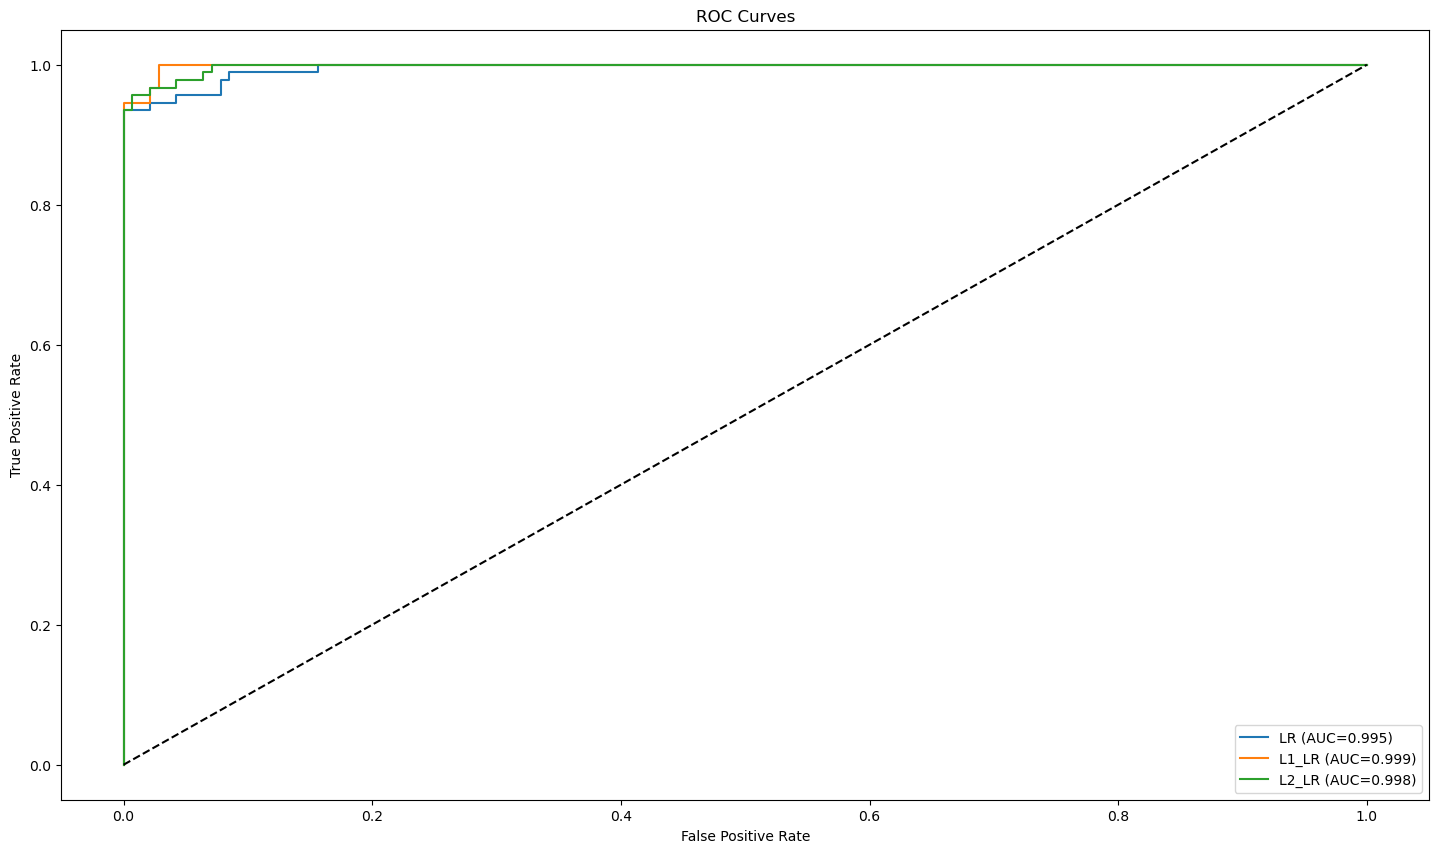

In [36]:
# ROC CURVE
plt.subplot(1, 3, 1)
for name, model in models.items():
    Y_prob = model.predict_proba(X_test_final)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    auc = roc_auc_score(Y_test, Y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.gca().set(
    title="ROC Curves",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)
plt.legend()

# Show the plot
plt.show()


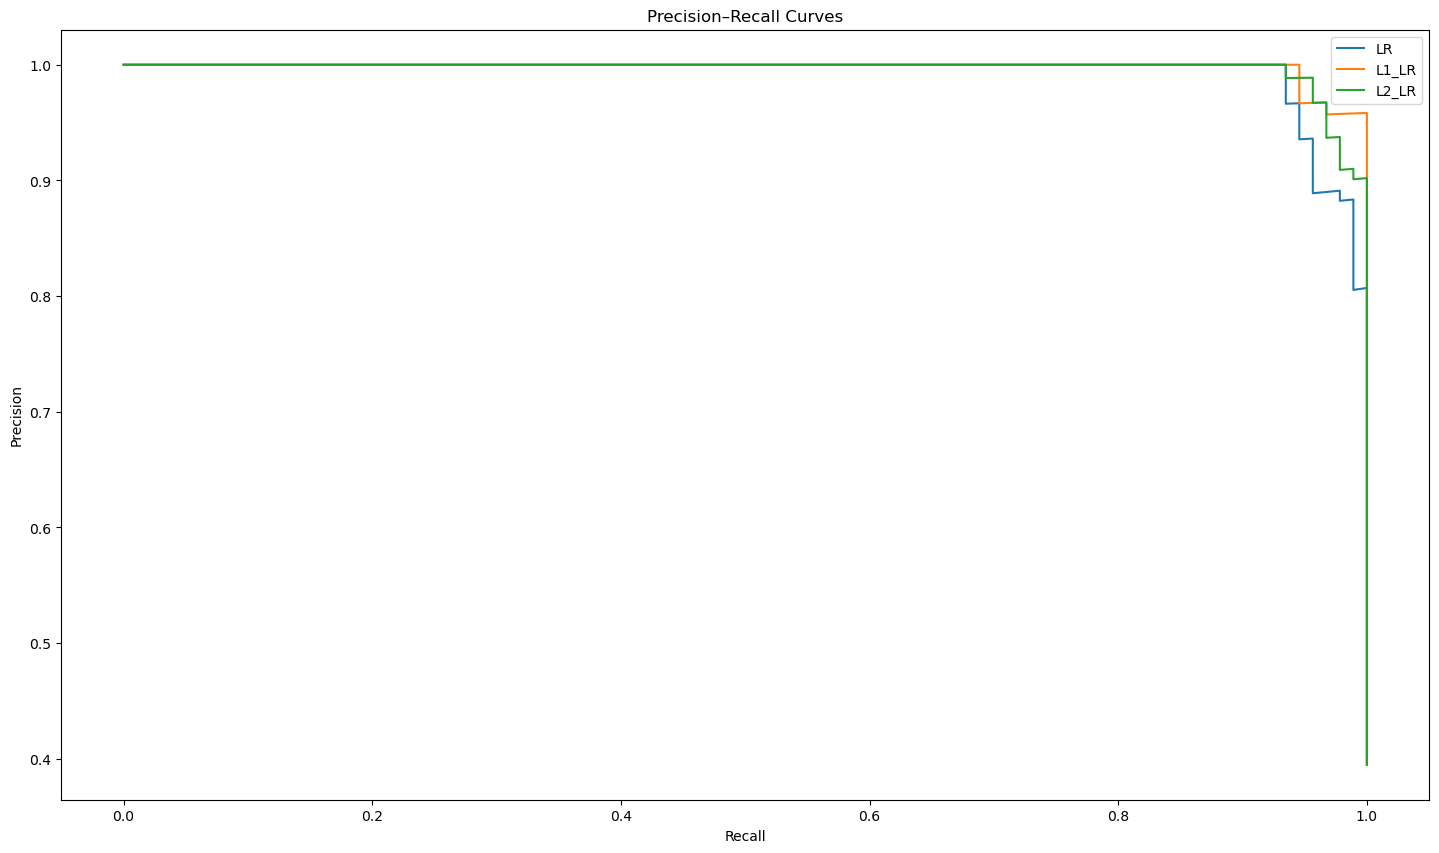

In [37]:
# PRECISION–RECALL CURVE

# Set the size of plot 
plt.figure(figsize=(60, 10))

plt.subplot(1, 3, 2)
for name, model in models.items():
    Y_prob = model.predict_proba(X_test_final)[:, 1]
    precision, recall, _ = precision_recall_curve(Y_test, Y_prob)
    plt.plot(recall, precision, label=name)

plt.gca().set(
    title="Precision–Recall Curves",
    xlabel="Recall",
    ylabel="Precision"
)
plt.legend()

# Show the plot
plt.show()


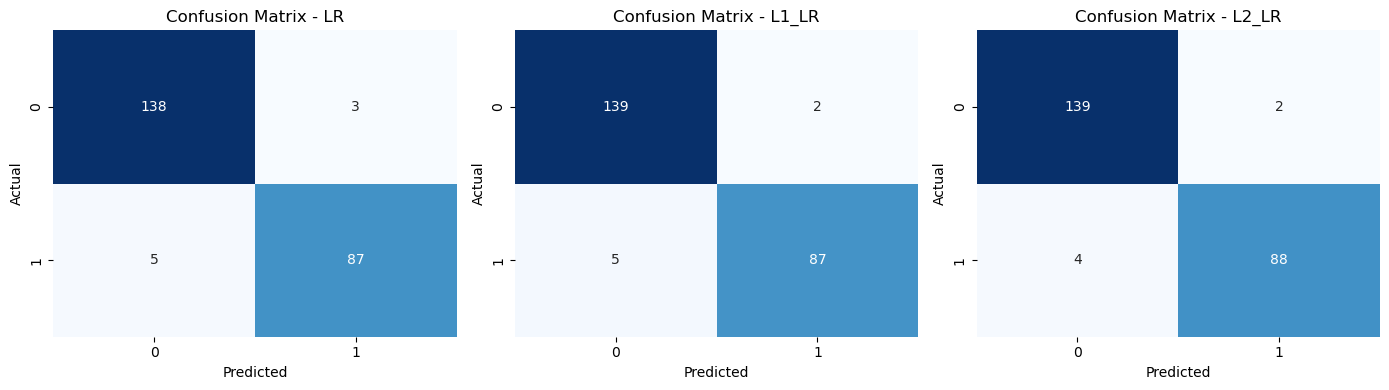

In [38]:
# Store confusion matrices and metrics
cms = {}
metrics = {}

for name, model in models.items():
    Y_pred = model.predict(X_test_final)
    Y_prob = model.predict_proba(X_test_final)[:, 1]

    cms[name] = confusion_matrix(Y_test, Y_pred)

    metrics[name] = {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1-Score": f1_score(Y_test, Y_pred),
        "ROC-AUC": roc_auc_score(Y_test, Y_prob)
    }

# Plot heatmaps
plt.figure(figsize=(14, 4))

for i, (name, cm) in enumerate(cms.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [39]:
# Print metrics
print("\n=== Classification Metrics ===")
for name, vals in metrics.items():
    print(f"\n{name}:")
    for k, v in vals.items():
        print(f"  {k}: {v:.4f}")



=== Classification Metrics ===

LR:
  Accuracy: 0.9657
  Precision: 0.9667
  Recall: 0.9457
  F1-Score: 0.9560
  ROC-AUC: 0.9950

L1_LR:
  Accuracy: 0.9700
  Precision: 0.9775
  Recall: 0.9457
  F1-Score: 0.9613
  ROC-AUC: 0.9986

L2_LR:
  Accuracy: 0.9742
  Precision: 0.9778
  Recall: 0.9565
  F1-Score: 0.9670
  ROC-AUC: 0.9977


In [40]:
# Random Forest Setup
RF = RandomForestClassifier(
    oob_score=True,   # Provide oob_scores
    random_state=42,  # For reproducibility purposes
    warm_start=True,  # For subsequent .fit() calls to build on top of pre-existing trees rather than re-building the entire tree from scratch
    n_jobs=-1         # Use all available CPU cores
)

In [41]:
oob_list = []
n_trees_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

for n_trees in n_trees_list:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train_final, Y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.009225
20.0,0.007380
30.0,0.003690
40.0,0.003690
50.0,0.003690
100.0,0.003690
150.0,0.003690
200.0,0.003690
300.0,0.003690


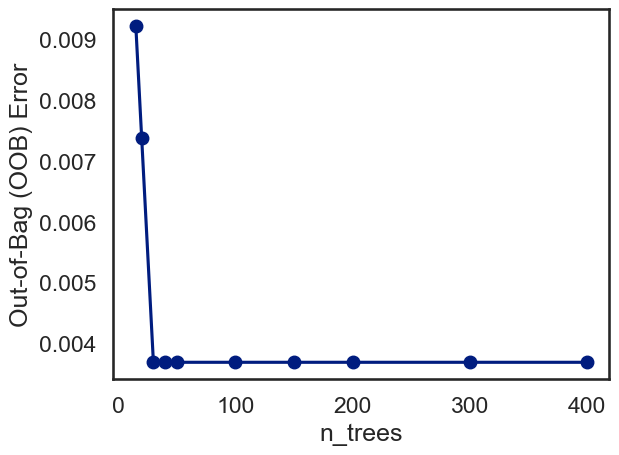

In [42]:
# Plot OOB Error vs Number of Trees
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='Out-of-Bag (OOB) Error')
plt.show()

In [43]:
# Fit final Random Forest with n_estimators=100
model = RF
Y_pred = model.predict(X_test_final)
Y_prob = model.predict_proba(X_test_final)

In [44]:
# Classification Metrics
metrics = {
    'Accuracy': accuracy_score(Y_test, Y_pred),
    'Precision': precision_score(Y_test, Y_pred),
    'Recall': recall_score(Y_test, Y_pred),
    'F1-Score': f1_score(Y_test, Y_pred),
    'ROC-AUC': roc_auc_score(Y_test, Y_prob[:, 1])
}

# Print metrics
print("\n=== Classification Metrics (for Random Forest) ===")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


=== Classification Metrics (for Random Forest) ===
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC-AUC: 1.0000


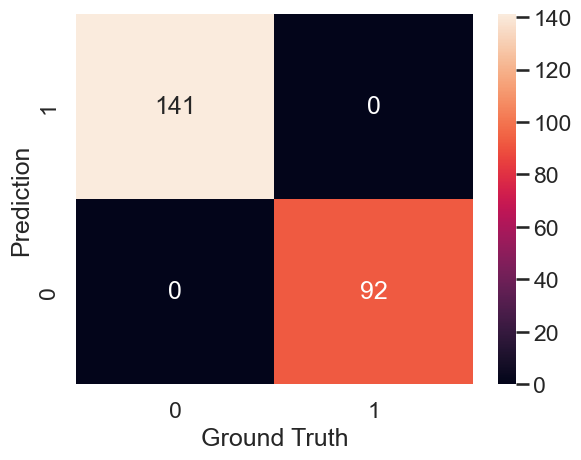

In [45]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
labels = ['0', '1']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')
plt.show()

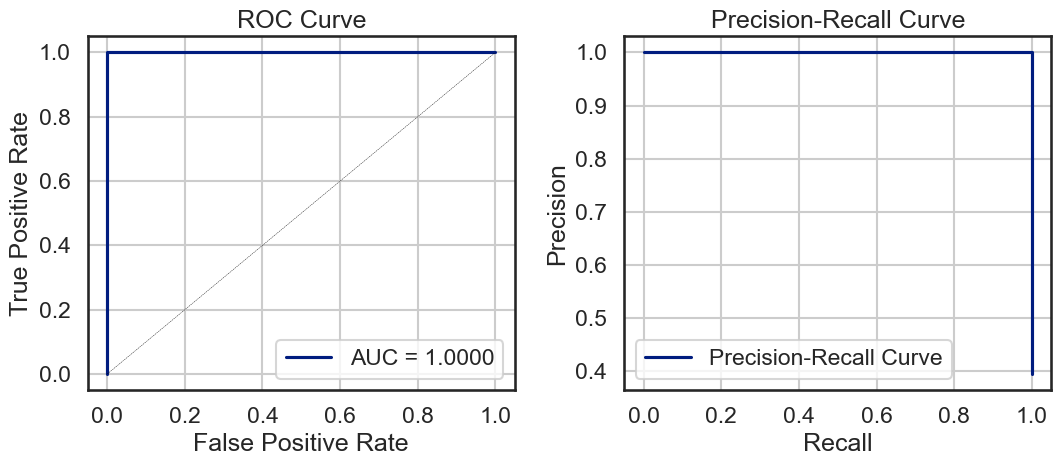

In [46]:
# ROC Curve & Precision-Recall Curve
fig, axList = plt.subplots(ncols=2, figsize=(11,5))

# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_prob[:, 1])
auc_value = roc_auc_score(Y_test, Y_prob[:, 1])

axList[0].plot(fpr, tpr, label=f"AUC = {auc_value:.4f}")
axList[0].plot([0, 1], [0, 1], ls='--', color='black', lw=0.3)
axList[0].set(
    xlabel='False Positive Rate',
    ylabel='True Positive Rate',
    title='ROC Curve'
)
axList[0].legend()
axList[0].grid(True)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, Y_prob[:, 1])

axList[1].plot(recall, precision, label="Precision-Recall Curve")
axList[1].set(
    xlabel='Recall',
    ylabel='Precision',
    title='Precision-Recall Curve'
)
axList[1].legend()
axList[1].grid(True)

plt.tight_layout()
plt.show()

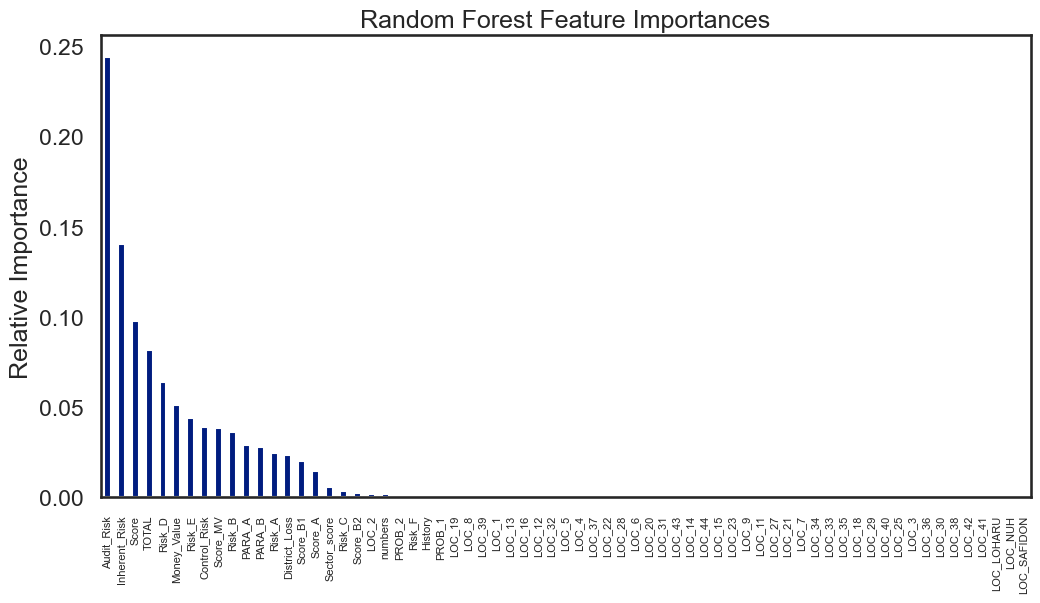

In [47]:
# Feature Importances
feature_cols = X_train_final.columns
feature_imp = pd.Series(RF.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(12,6))
ax.set(ylabel='Relative Importance', title='Random Forest Feature Importances')

# Decrease x-axis label font size
plt.xticks(fontsize=8)

plt.show()

In [48]:
# Checking if 'Audit_Risk' perfectly separates the 'Risk' classes (0 and 1)
pd.crosstab(df['Audit_Risk'] >= 1, df['Risk'])

# NOTE: It does, so let's run Logistic Regression and Random Forest again, but removing 'Audit_Risk'

Risk,0,1
Audit_Risk,,
False,470,0
True,0,305


In [49]:
# Drop 'Audit_Risk'
df = df.drop(columns=["Audit_Risk"])
# 1. Define feature columns
numeric_cols = [col for col in df.columns if col not in ['LOCATION_ID', 'Risk']]

# 2️. Stratified Shuffle Split: 70% train, 30% test
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
train_idx, test_idx = next(sss.split(df[numeric_cols], df['Risk']))

# Split data into X and Y
X_train = df.loc[train_idx, numeric_cols + ['LOCATION_ID']].copy()
Y_train = df.loc[train_idx, 'Risk'].copy()
X_test  = df.loc[test_idx, numeric_cols + ['LOCATION_ID']].copy()
Y_test  = df.loc[test_idx, 'Risk'].copy()

# 3️. Scale numeric features (exclude LOCATION_ID)
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train[numeric_cols]),
    columns=numeric_cols,
    index=X_train.index
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[numeric_cols]),
    columns=numeric_cols,
    index=X_test.index
)

# 4. One-hot encode 'LOCATION_ID'
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

X_train_ohe = pd.DataFrame(
    ohe.fit_transform(X_train[['LOCATION_ID']]),
    columns=[f"LOC_{str(i)}" for i in ohe.categories_[0]],  # Convert everything to string
    index=X_train.index
)

X_test_ohe = pd.DataFrame(
    ohe.transform(X_test[['LOCATION_ID']]),
    columns=[f"LOC_{str(i)}" for i in ohe.categories_[0]],
    index=X_test.index
)

# Concatenate scaled numeric features with one-hot LOCATION_ID
X_train_final = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test_ohe], axis=1)

print(X_train_final.shape, X_test_final.shape)


(542, 66) (233, 66)


In [50]:
X_train_final

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B1,Risk_B,TOTAL,numbers,Score_B2,...,LOC_43,LOC_44,LOC_5,LOC_6,LOC_7,LOC_8,LOC_9,LOC_LOHARU,LOC_NUH,LOC_SAFIDON
600,0.926207,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
0,0.035172,0.049176,1.0,0.049176,1.976863e-03,0.0,6.589543e-04,0.005264,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,0.000000,0.060353,1.0,0.060353,7.116706e-05,0.0,2.372235e-05,0.004114,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,0.000000,0.033059,1.0,0.033059,3.242055e-04,0.0,1.080685e-04,0.002538,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
285,0.008966,0.022353,0.5,0.014902,6.302239e-03,1.0,6.302239e-03,0.007778,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.035172,0.014000,0.5,0.009333,1.018480e-02,1.0,1.018480e-02,0.011088,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
646,0.926207,0.003765,0.0,0.001255,0.000000e+00,0.0,0.000000e+00,0.000252,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
713,0.926207,0.003765,0.0,0.001255,7.116706e-07,0.0,2.372235e-07,0.000253,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
683,0.926207,0.009176,0.0,0.003059,0.000000e+00,0.0,0.000000e+00,0.000615,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [51]:
 # After dropping 'Audit_Risk' and preprocessing, re-do Logistic Regression models
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_final, Y_train)

lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear', max_iter=5000)
lr_l1.fit(X_train_final, Y_train)

lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear', max_iter=5000)
lr_l2.fit(X_train_final, Y_train)

models = {
    "LR": LR,
    "LR_L1": lr_l1,
    "LR_L2": lr_l2
}

# Turn off interactive mode
plt.ioff()
# Set the size of plot 
plt.figure(figsize=(60, 10));

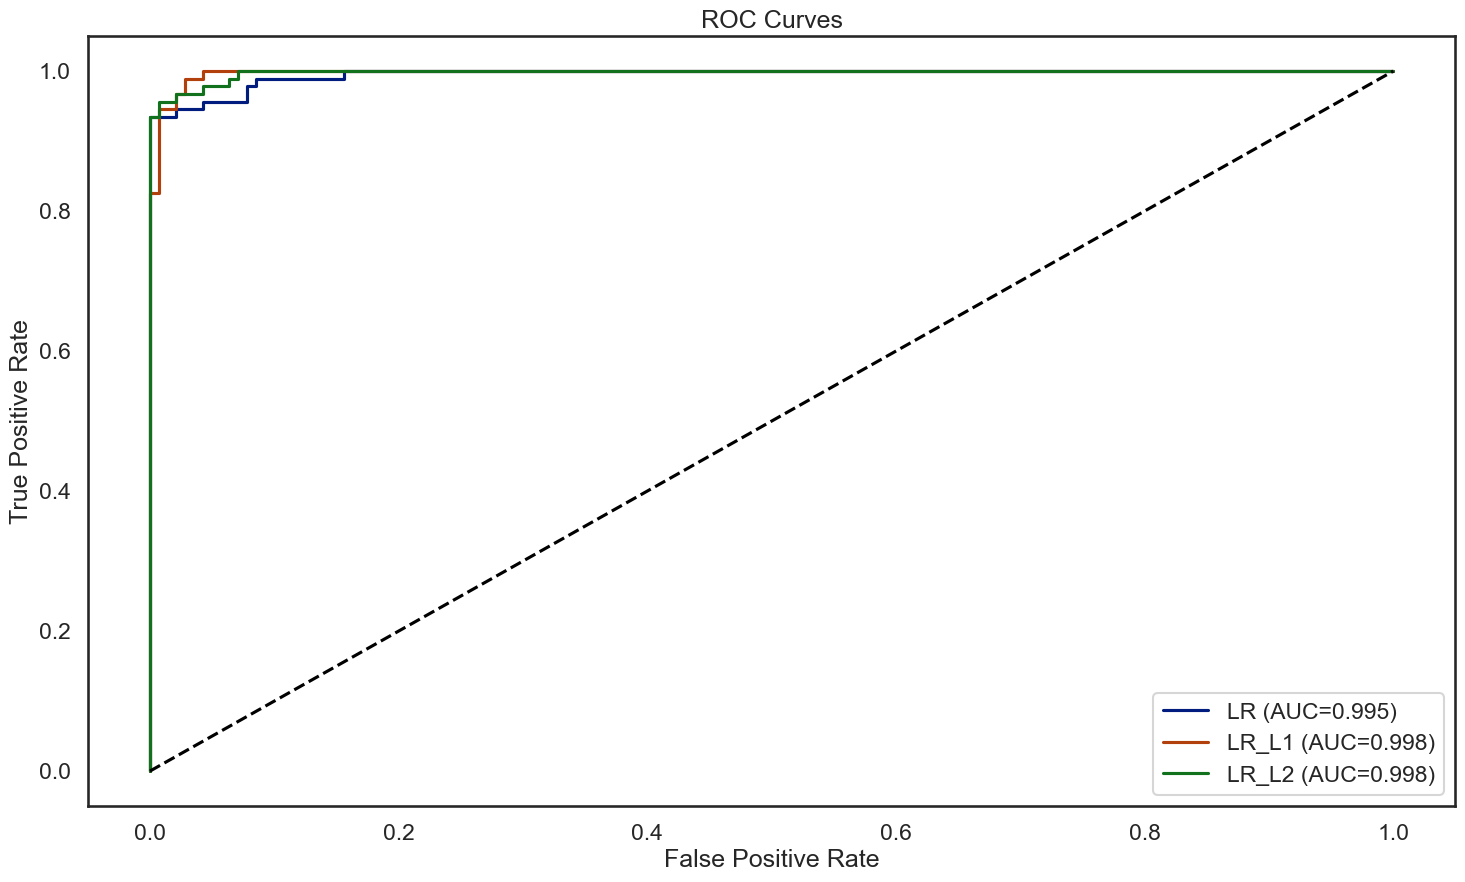

In [52]:
# ROC CURVE
plt.subplot(1, 3, 1)
for name, model in models.items():
    Y_prob = model.predict_proba(X_test_final)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, Y_prob)
    auc = roc_auc_score(Y_test, Y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.gca().set(
    title="ROC Curves",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)
plt.legend()

# Show the plot
plt.show()


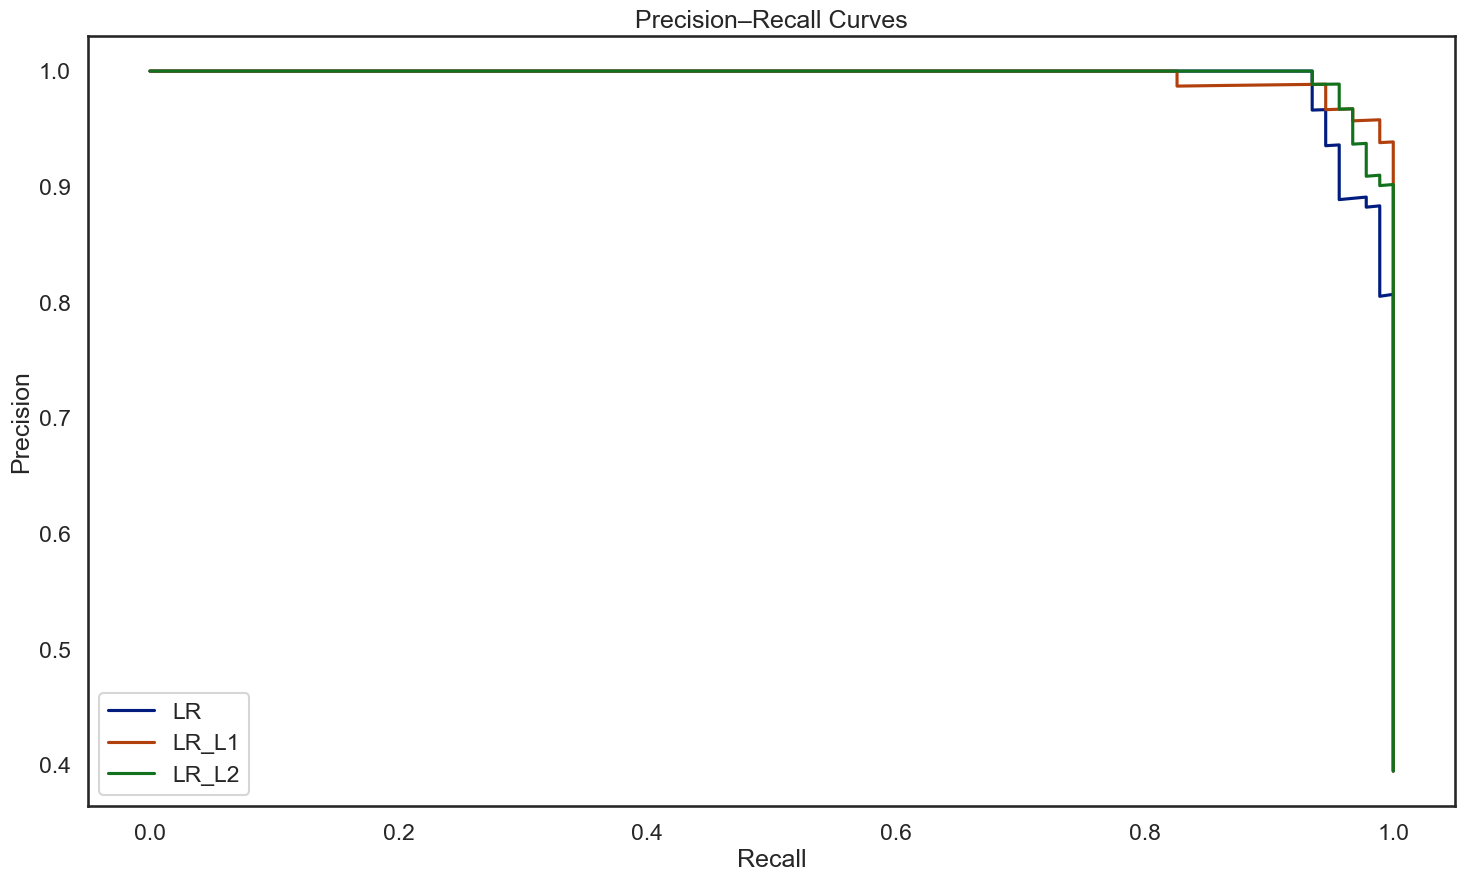

In [53]:
# PRECISION–RECALL CURVE

# Set the size of plot 
plt.figure(figsize=(60, 10))

plt.subplot(1, 3, 2)
for name, model in models.items():
    Y_prob = model.predict_proba(X_test_final)[:, 1]
    precision, recall, _ = precision_recall_curve(Y_test, Y_prob)
    plt.plot(recall, precision, label=name)

plt.gca().set(
    title="Precision–Recall Curves",
    xlabel="Recall",
    ylabel="Precision"
)
plt.legend()

# Show the plot
plt.show()

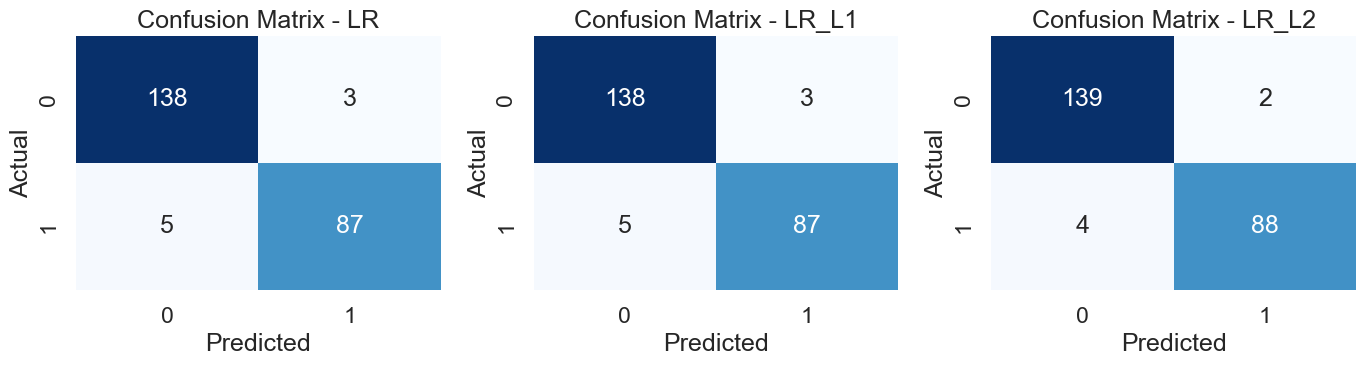

In [54]:
# Store confusion matrices and metrics
cms = {}
metrics = {}

for name, model in models.items():
    Y_pred = model.predict(X_test_final)
    Y_prob = model.predict_proba(X_test_final)[:, 1]

    cms[name] = confusion_matrix(Y_test, Y_pred)

    metrics[name] = {
        "Accuracy": accuracy_score(Y_test, Y_pred),
        "Precision": precision_score(Y_test, Y_pred),
        "Recall": recall_score(Y_test, Y_pred),
        "F1-Score": f1_score(Y_test, Y_pred),
        "ROC-AUC": roc_auc_score(Y_test, Y_prob)
    }

# Plot heatmaps
plt.figure(figsize=(14, 4))

for i, (name, cm) in enumerate(cms.items()):
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


In [55]:
# Print metrics
print("\n=== Classification Metrics (After dropping 'Audit_Risk')===")
for name, vals in metrics.items():
    print(f"\n{name}:")
    for k, v in vals.items():
        print(f"  {k}: {v:.4f}")



=== Classification Metrics (After dropping 'Audit_Risk')===

LR:
  Accuracy: 0.9657
  Precision: 0.9667
  Recall: 0.9457
  F1-Score: 0.9560
  ROC-AUC: 0.9950

LR_L1:
  Accuracy: 0.9657
  Precision: 0.9667
  Recall: 0.9457
  F1-Score: 0.9560
  ROC-AUC: 0.9976

LR_L2:
  Accuracy: 0.9742
  Precision: 0.9778
  Recall: 0.9565
  F1-Score: 0.9670
  ROC-AUC: 0.9977


In [56]:
# Re-do Random Forest model
RF = RandomForestClassifier(
    oob_score=True,   # Provide oob_scores
    random_state=42,  # For reproducibility purposes
    warm_start=True,  # For subsequent .fit() calls to build on top of pre-existing trees rather than re-building the entire tree from scratch
    n_jobs=-1         # Use all available CPU cores
)
oob_list = []
n_trees_list = [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]

for n_trees in n_trees_list:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train_final, Y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

,oob
n_trees,
15.0,0.012915
20.0,0.012915
30.0,0.012915
40.0,0.012915
50.0,0.012915
100.0,0.007380
150.0,0.012915
200.0,0.012915
300.0,0.011070


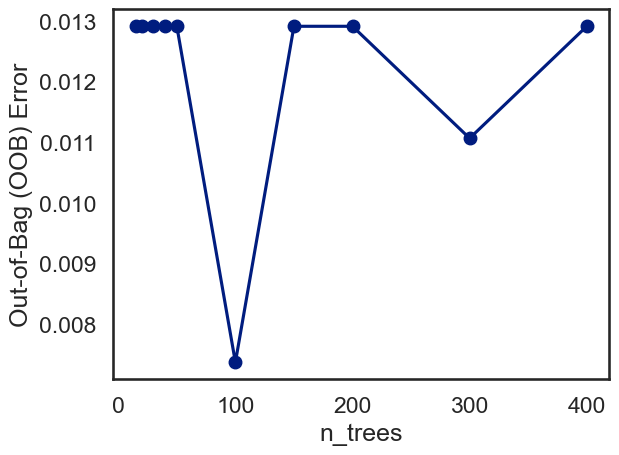

In [57]:
# Plot OOB Error vs Number of Trees
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='Out-of-Bag (OOB) Error')
plt.show()

In [58]:
# Fit final Random Forest with n_estimators=100
model = RF
Y_pred = model.predict(X_test_final)
Y_prob = model.predict_proba(X_test_final)


In [59]:
# Classification Metrics
metrics = {
    'Accuracy': accuracy_score(Y_test, Y_pred),
    'Precision': precision_score(Y_test, Y_pred),
    'Recall': recall_score(Y_test, Y_pred),
    'F1-Score': f1_score(Y_test, Y_pred),
    'ROC-AUC': roc_auc_score(Y_test, Y_prob[:, 1])
}

# Print metrics
print("\n=== Classification Metrics (for Random Forest after dropping 'Audit_Risk') ===")
for name, value in metrics.items():
    print(f"{name}: {value:.4f}")


=== Classification Metrics (for Random Forest after dropping 'Audit_Risk') ===
Accuracy: 0.9957
Precision: 1.0000
Recall: 0.9891
F1-Score: 0.9945
ROC-AUC: 1.0000


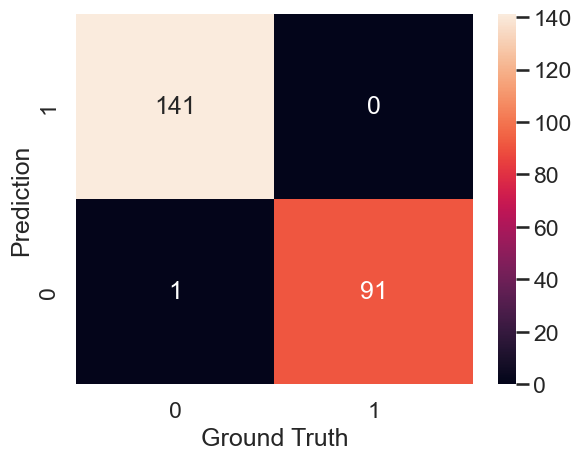

In [60]:
# Confusion Matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
ax = sns.heatmap(conf_mat, annot=True, fmt='d')
labels = ['0', '1']
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth')
plt.show()

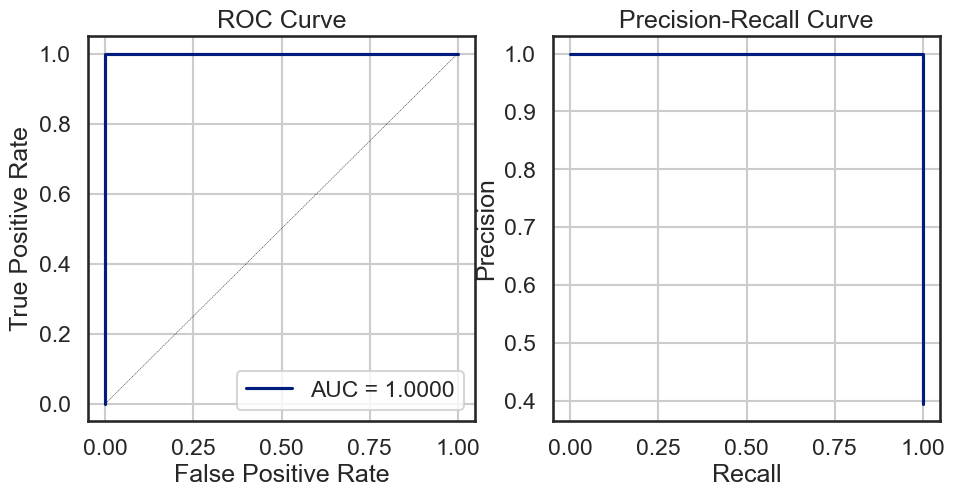

In [61]:
fig, axList = plt.subplots(ncols=2, figsize=(11,5))

# ROC
fpr, tpr, _ = roc_curve(Y_test, Y_prob[:, 1])
auc_value = roc_auc_score(Y_test, Y_prob[:, 1])

axList[0].plot(fpr, tpr, label=f"AUC = {auc_value:.4f}")
axList[0].plot([0,1],[0,1], ls='--', color='black', lw=0.3)
axList[0].set(xlabel='False Positive Rate', ylabel='True Positive Rate', title='ROC Curve')
axList[0].legend(loc='lower right')
axList[0].grid(True)

# Precision-Recall
precision, recall, _ = precision_recall_curve(Y_test, Y_prob[:, 1])
axList[1].plot(recall, precision)
axList[1].set(xlabel='Recall', ylabel='Precision', title='Precision-Recall Curve')
axList[1].grid(True)

plt.show()

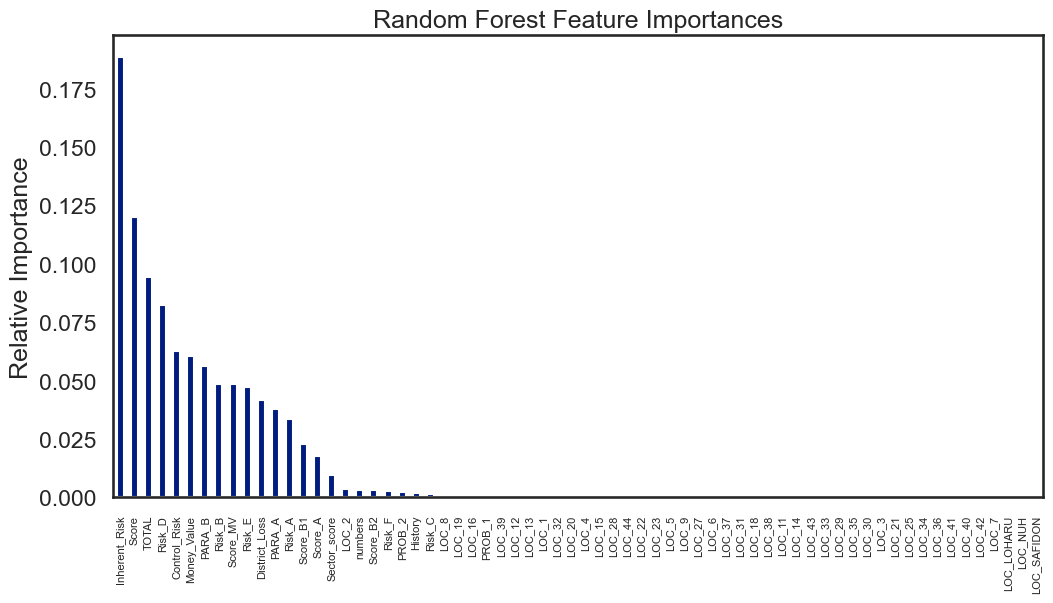

In [62]:
# Feature Importances
feature_cols = X_train_final.columns
feature_imp = pd.Series(RF.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(12,6))
ax.set(ylabel='Relative Importance', title='Random Forest Feature Importances')

# Decrease x-axis label font size
plt.xticks(fontsize=8)

plt.show()